In [75]:
import csv
import numpy as np
import torch
import matplotlib.pyplot as plt

In [148]:

device = torch.device("cuda:0")
with open('data\\stars.csv', 'r', newline='') as csvfile:
    names = csv.reader(csvfile, delimiter=',', quotechar='#', quoting=csv.QUOTE_MINIMAL)
    with open('data\\lenghts.csv', 'r') as lenghts:
        lenghtreader = csv.reader(lenghts, delimiter=',', quotechar='#', quoting=csv.QUOTE_MINIMAL)
        feactures = int(next(lenghtreader)[0])
        samples = 0
        for _ in lenghtreader:
            samples += 1
    data_martix = np.zeros((samples * 21, 60, 2))
    lables_martix = np.zeros((samples * 21,1))
    i = 0
    for name, label in names:
        freq = np.loadtxt('data\\{}_freq.csv'.format(name), delimiter=',')
        freq = 1/(freq)
        label = int(float(label))
        if freq.shape[0] < label:
            continue
        indexes = np.random.choice(freq.shape[0] - 30, 20, replace = False)
        power = np.loadtxt('data\\{}_power.csv'.format(name), delimiter=',')
        for x in indexes: 
            data_martix[i] = np.array(list(freq[x:x + 30]) + list(power[x:x + 30]))
            lables_martix[i] =  (x <= label) and (label < (x + 30)) 
            i += 1
        if label + 30 > freq.shape[0]:
            label -= (label + 30) - freq.shape[0] 
        data_martix[i] = np.array(list(freq[label:label + 30]) + list(power[label:label + 30]))
        lables_martix[i] = 1
        i += 1
data_martix = data_martix.astype('float')

In [149]:
data_martix.shape

(9975, 60, 2)

C:\Users\Scott\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


(14.660209055528258, 2000)

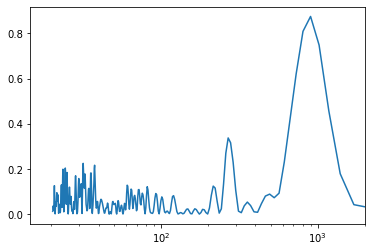

In [139]:
name = '6 Lyn'
freq = np.loadtxt('data\\{}_freq.csv'.format(name), delimiter=',')
freq = 1/(freq)
power = np.loadtxt('data\\{}_power.csv'.format(name), delimiter=',')
plt.semilogx(freq, power)
plt.semilogx(label, [0.5])
plt.xlim(0,2000)

C:\Users\Scott\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


(2.4466072186116787, 10000)

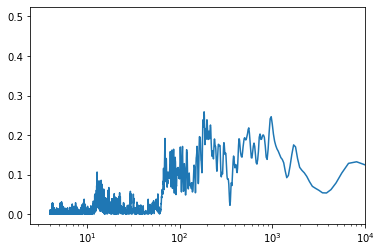

In [141]:
name = '51 Peg'
freq = np.loadtxt('data\\{}_freq.csv'.format(name), delimiter=',')
freq = 1/(freq)
power = np.loadtxt('data\\{}_power.csv'.format(name), delimiter=',')
plt.semilogx(freq, power)
plt.semilogx(label, [0.5])
plt.xlim(0,10000)

C:\Users\Scott\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


(5.376856144186516, 5000)

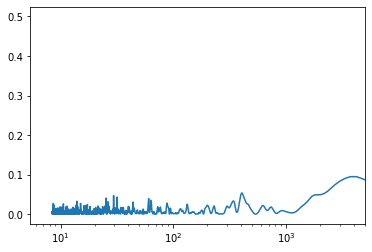

In [144]:
name = 'GJ 849'
freq = np.loadtxt('data\\{}_freq.csv'.format(name), delimiter=',')
freq = 1/(freq)
power = np.loadtxt('data\\{}_power.csv'.format(name), delimiter=',')
plt.semilogx(freq, power)
plt.semilogx(label, [0.5])
plt.xlim(0,5000)

In [150]:
class Net(torch.nn.Module):

    def __init__(self, input_size):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = torch.nn.Linear(input_size, 1000)
        self.fc2 = torch.nn.Linear(1000, 1000)
        self.fc3 = torch.nn.Linear(1000, 1000)
        self.fc4 = torch.nn.Linear(1000, 1000)
        self.fc5 = torch.nn.Linear(1000, 2)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.nn.functional.relu(self.fc3(x))
        #x = torch.nn.functional.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [152]:
net = Net(data_martix.shape[1])
net.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
train = data_martix[int(data_martix.shape[0]*0.2):,:]
test = data_martix[:int(data_martix.shape[0]*0.2),:]
class stars_dataset(torch.utils.data.Dataset):
    def __init__(self,inputs):
        self.inputs = inputs
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        data = torch.tensor(self.inputs[idx,:,0])
        label = torch.tensor(self.inputs[idx,0,1])
        return {"data":data,"label":label}
    
    def __len__(self):
        return len(self.inputs)
    
dataset = stars_dataset(train)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=100,
                        shuffle=True)
losses = []
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = data['data'].float().to(device)
        labels = data['label'].long().to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = torch.squeeze(net(inputs))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        print(loss.item())
        losses.append(loss.item())
print("done")

0.5674488544464111
0.33349815011024475
0.5656704902648926
0.8365907073020935
1.2602888345718384
1.140312910079956
1.5125139951705933
1.014176607131958
0.7346373796463013
0.342947781085968
0.23396438360214233
0.24429970979690552
0.24266201257705688
0.20324501395225525
0.1769065111875534
0.17175453901290894
0.1666194498538971
0.22995954751968384
0.20050138235092163
0.13040389120578766
0.19183875620365143
0.15224617719650269
0.17712520062923431
0.1147010549902916
0.09630047529935837
0.11713730543851852
0.11989522725343704
0.11279100179672241
0.14981001615524292
0.11181960999965668
0.11712107807397842
0.09931100904941559
0.10729756951332092
0.09874293953180313
0.10618379712104797
0.08797886222600937
0.08789198100566864
0.07354281842708588
0.10150780528783798
0.0807642936706543
0.08730337768793106
0.07857616990804672
0.08268477767705917
0.07244480401277542
0.08231180906295776
0.07443731278181076
0.06321301311254501
0.06885311752557755
0.07771524786949158
0.0516461618244648
0.052053071558475

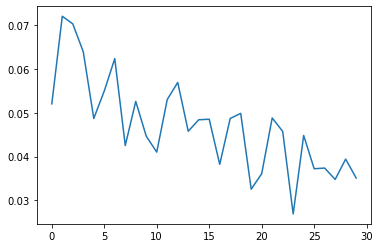

In [153]:
plt.plot(losses[50:])
plt.show()

In [118]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
output = net(torch.tensor(test[:,:,0]).float().to(device)).cpu().detach().numpy()
print(f1_score(test[:,0,1],output))
print(precision_score(test[:,0,1],output))
print(precision_score(test[:,0,1],output))

RuntimeError: Tensor for 'out' is on CPU, Tensor for argument #1 'self' is on CPU, but expected them to be on GPU (while checking arguments for addmm)

In [106]:
print(output[:10])
print(test[:10,0,1])

[[419.25955]
 [419.25955]
 [419.25955]
 [419.25955]
 [419.25955]
 [419.25955]
 [419.25955]
 [419.25955]
 [419.25955]
 [419.25955]]
[ 326.03      516.21997   185.84     1773.40002   798.5       993.3
  452.8       479.1      1078.          4.230785]


In [107]:
print(outputs[:10])

tensor([[407.1431],
        [407.1431],
        [407.1431],
        [407.1431],
        [407.1431],
        [407.1431],
        [407.1431],
        [407.1431],
        [407.1431],
        [407.1431]], device='cuda:0', grad_fn=<SliceBackward>)
